In [3]:
import torch
from torch import nn
# from torchvision.models import resnet50

In [6]:
args = {
    'name': 'resnet50',
    'fpn_type': 'panoptic',
    'num_classes': 7,
    'fpn_channels': 256,
    'in_channels': 3,
    'out_size': (256, 256),
    'freeze_backbone': True
}
model_weights_path = '/home/adeel/rvexp/data/ss/out_2023_07_05_full/train/last-model.pth'
model = torch.hub.load(
    'AdeelH/pytorch-fpn:freeze',
    'make_fpn_resnet',
    source='github',
    trust_repo=True,
    **args
)
model.load_state_dict(torch.load(model_weights_path))

model_untrained = torch.hub.load(
    'AdeelH/pytorch-fpn:freeze',
    'make_fpn_resnet',
    source='github',
    trust_repo=True,
    **args
)

Using cache found in /root/.cache/torch/hub/AdeelH_pytorch-fpn_freeze


Freezing FPN backbone


Using cache found in /root/.cache/torch/hub/AdeelH_pytorch-fpn_freeze


Freezing FPN backbone


In [12]:
for p1, p2 in zip(model_untrained[0].parameters(), model[0].parameters()):
    torch.testing.assert_close(p1, p2)

In [27]:
with torch.inference_mode():
    for p1, p2 in zip(model_untrained[1].parameters(), model[1].parameters()):
        print(nn.functional.cosine_similarity(p1.reshape(1, -1), p2.reshape(1, -1)).item())

-0.01147005520761013
-0.0019791866652667522
-0.006085053086280823
-0.011745680123567581
-0.003939828369766474
-0.03100428730249405
-0.004253107123076916
0.0993494838476181
0.0004632360069081187
0.05495848506689072
-0.0003020756412297487
0.050747815519571304
0.999994158744812
0.0
0.0019552260637283325
0.027872569859027863
0.9999704360961914
0.0
-3.600244235713035e-05
-0.050887685269117355
0.9999819397926331
0.0
-0.0011168867349624634
0.038166336715221405
0.9999822378158569
0.0
0.00011822453234344721
-0.03819749876856804
0.9999869465827942
0.0
-0.00010135816410183907
0.0348353311419487
0.9999863505363464
0.0
0.0008358770865015686
-0.03620642423629761
0.9999628663063049
0.0
7.598730735480785e-05
0.09573088586330414
0.9999955892562866
0.0
0.0024640043266117573
-0.045499395579099655
0.9999920129776001
0.0
-0.0005265302024781704
-0.052738089114427567
0.9999935030937195
0.0
0.0019535296596586704
-0.06580683588981628
0.9999731183052063
0.0
-0.019811498001217842
-0.4607834219932556


In [12]:
100 * -0.037312 / 0.896467

-4.162116396922586

### F1 scores

**car**: 0.855409 - 0.900726  = -0.045316  **(-5%)**  
**building**: 0.916617 - 0.960144  = -0.043528 **(-4.5%)**   
**low vegetation**: 0.849747 - 0.878416  = -0.028668  **(-3.3%)**  
**tree**: 0.790538 - 0.846724  = -0.056186  **(-6.6%)**  
**impervious**: 0.883736 - 0.910024  = -0.026288  **(-2.9%)**  
**clutter**: 0.325565 - 0.408287  = -0.082722  **(-20.2%)**  
    
**overall**: 0.859155 - 0.896467  = -0.037312  **(-4.16%)**

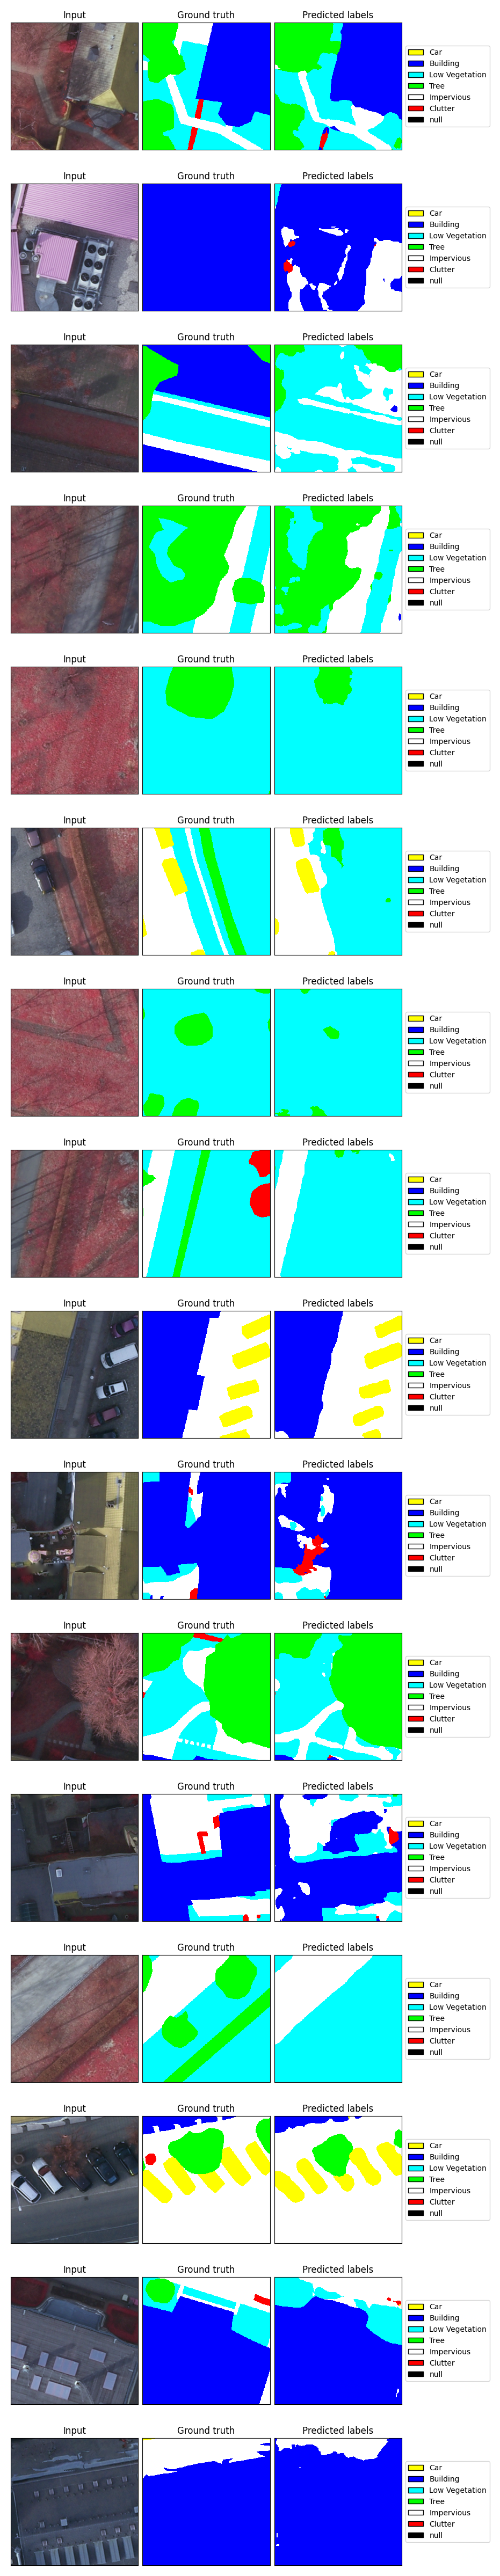

In [3]:
from IPython.display import Image
Image(filename='/home/adeel/rvexp/data/ss/out_2023_07_05_full/train/valid_preds.png')